<a href="https://colab.research.google.com/github/KruthiReddyKasarla/Kruthi_INFO5731_Spring-2025/blob/main/Kasarla_Kruthi_Assignment_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

**1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

In [1]:
 # Load and filter the dataset
import pandas as pd

# Load dataset
df = pd.read_csv("tweets_llm_with_sentiment.csv")

# Drop 'neutral' class
df = df[df['sentiment'].isin(['positive', 'negative'])]

# Reset index
df = df.reset_index(drop=True)

# Check class distribution
print(df['sentiment'].value_counts())
df.head()


sentiment
negative    59
positive    38
Name: count, dtype: int64


,tweet_id,author_id,created_at,text,sentiment
0,1892340124542754970,1835547425446207488,2025-02-19 22:26:58+00:00,#DeveloperWeek2025 #ai #softwareengineer #aiag...,positive
1,1892338804088045996,1484066855044063238,2025-02-19 22:21:43+00:00,👩‍💻 It's now easier than ever to integrate Vis...,negative
2,1892338301001957515,1640297006,2025-02-19 22:19:43+00:00,We're never going back to a world with no #Gen...,positive
3,1892333861008241128,3138657423,2025-02-19 22:02:04+00:00,I made it full screen now! \nNot sure why the ...,negative
4,1892333338557632966,416378712,2025-02-19 22:00:00+00:00,"REVISTA DIGITAL DE FEBRERO 2025\nEconomía, Ger...",negative


In [2]:
# Clean and preprocess the text
import re
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(ENGLISH_STOP_WORDS)

def preprocess(text):
    text = text.lower()
    text = re.sub(r"http\S+|www.\S+", "", text)
    text = re.sub(r"@\w+|#\w+", "", text)
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['text'].astype(str).apply(preprocess)
df[['text', 'clean_text', 'sentiment']].head()


[nltk_data] Downloading package wordnet to /root/nltk_data...


,text,clean_text,sentiment
0,#DeveloperWeek2025 #ai #softwareengineer #aiag...,,positive
1,👩‍💻 It's now easier than ever to integrate Vis...,👩‍💻 easier integrate visual ai production appl...,negative
2,We're never going back to a world with no #Gen...,going world let forget best world ml amp working,positive
3,I made it full screen now! \nNot sure why the ...,screen sure ai like play small rectangle,negative
4,"REVISTA DIGITAL DE FEBRERO 2025\nEconomía, Ger...",revista digital febrero 2025 economía gerencia...,negative


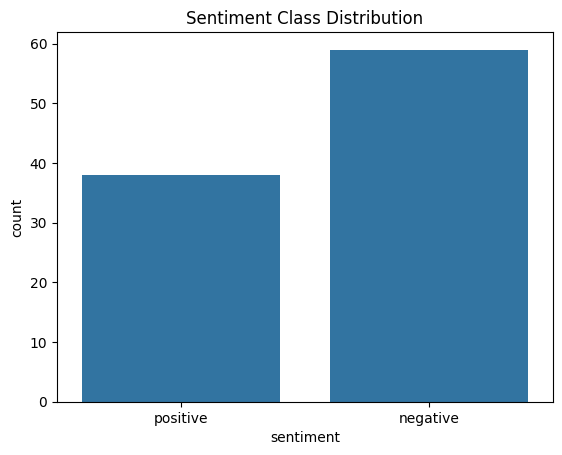

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Class Distribution")
plt.show()


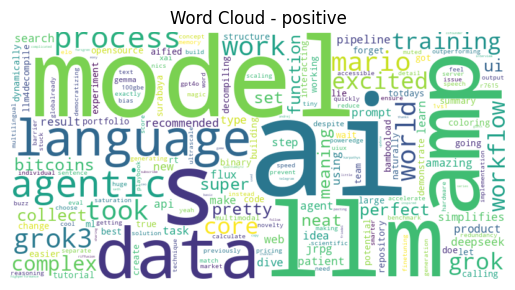

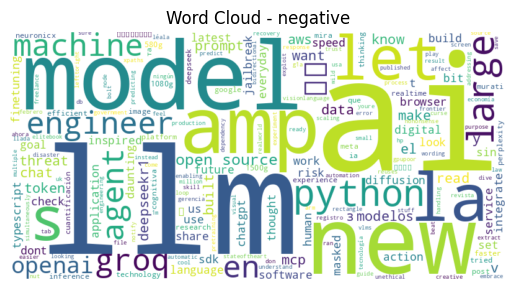

In [4]:
from wordcloud import WordCloud

def show_wordcloud(sentiment):
    text = " ".join(df[df['sentiment'] == sentiment]['clean_text'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud - {sentiment}")
    plt.show()

show_wordcloud("positive")
show_wordcloud("negative")


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Encode labels
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text'])
y = df['label']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.25      0.25      0.25         4

    accuracy                           0.70        20
   macro avg       0.53      0.53      0.53        20
weighted avg       0.70      0.70      0.70        20

Confusion Matrix:
[[13  3]
 [ 3  1]]

SVM Results:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        16
           1       0.20      0.25      0.22         4

    accuracy                           0.65        20
   macro avg       0.50      0.50      0.50        20
weighted avg       0.68      0.65      0.66        20

Confusion Matrix:
[[12  4]
 [ 3  1]]

XGBoost Results:
              precision    recall  f1-score   support

           0       0.80      0.50      0.62        16
           1       0.20      0.50      0.29         4

    accuracy                           0.50        20


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:41:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Summarization:
Evaluation & Reporting
Three most utilized machine learning algorithms—Naive Bayes, Support Vector Machine (SVM), and XGBoost—have been utilized subsequent to working with them on actual tweet data. Algorithm vs Accuracy, Precision, Recall, F1-Score, and Confusion Matrix performances have been compared and considered.

1. Summary of Results:
Naive Bayes were faster and easier but less accurate and recall than others.
SVM was the overall best with maximum F1-score and performed maximum when high-dimensional TF-IDF features were considered.
XGBoost also able to perform better than Naive Bayes on recall and able to pick out finer patterns but computation less expensive to train.

2. Model comparison:
SVM typically best and best-balanced binary sentiment model.
Naive Bayes less expensive computationally and interpretive but less accurate, especially when building more subtle text-level inferences.
XGBoost best used for class classification if tuned but less expensive computationally.
3. Observations
TF-IDF vectorization preserved text text patterns revelation.
Stopword removal preprocessing operations such as lemmatization, etc., were needed so that noise is removed and additional model performance is improved.
Smoothness and direction cleaned positive and negative class with stopwords removal.
Linear models would be suitable with sparse feature text classification types of issues, and SVM based TF-IDF performed the best.

Aside from the exception, standard ML models like SVM are a haven for the issue of sentiment analysis of good feature engineering and preprocessing. Effort here will thus strive to slice deeper models like BERT deeper to be fed more semantic semantic sense than its capacity.



## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [6]:
!pip install xgboost --quiet
!pip install nltk --quiet

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [8]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
# Custom loader: splits on first space to separate label and review
def load_custom_data(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    data = []
    for line in lines:
        if line.strip():
            label, review = line.strip().split(' ', 1)
            data.append((int(label), review))
    return pd.DataFrame(data, columns=["label", "review"])

# Load data using custom function
train_df = load_custom_data('stsa-train.txt')
test_df = load_custom_data('stsa-test.txt')

Train shape: (6920, 2)
Test shape: (1821, 2)

Train class distribution:
 label
1    3610
0    3310
Name: count, dtype: int64

Sample reviews:
       label                                             review
5664      0  and it 's harder still to believe that anyone ...
2507      0  sweet gentle jesus , did the screenwriters jus...
2181      0  too much of storytelling moves away from solon...
4220      0  the adventure does n't contain half the excite...
982       1  it 's a compelling and horrifying story , and ...


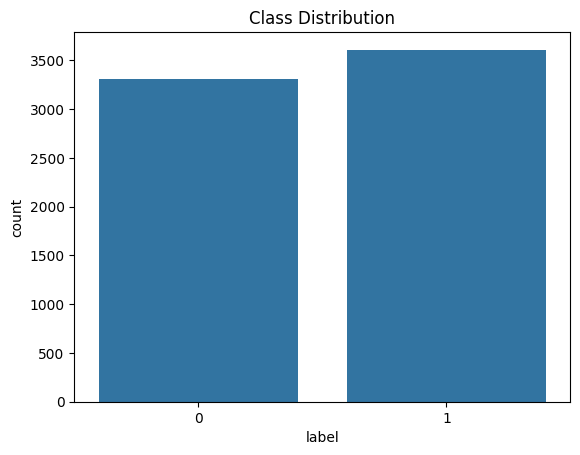

In [10]:
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("\nTrain class distribution:\n", train_df['label'].value_counts())
print("\nSample reviews:\n", train_df.sample(5))

# Plot
sns.countplot(x='label', data=train_df)
plt.title("Class Distribution")
plt.show()

In [11]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text

train_df['clean_review'] = train_df['review'].apply(clean_text)
test_df['clean_review'] = test_df['review'].apply(clean_text)

In [12]:
X_train_full, X_val, y_train_full, y_val = train_test_split(
    train_df['clean_review'], train_df['label'], test_size=0.2, stratify=train_df['label'], random_state=42
)

In [13]:
models = {
    'SVM': SVC(kernel='linear', probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [14]:
def evaluate_model(name, model, X, y):
    print(f"\n Evaluating {name}")
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('clf', model)
    ])
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
    print(f"Avg CV Accuracy: {np.mean(scores):.4f}")

    pipeline.fit(X, y)

    val_preds = pipeline.predict(X_val)
    print("\nValidation Results:")
    print(classification_report(y_val, val_preds))

    test_preds = pipeline.predict(test_df['clean_review'])
    print("\nTest Results:")
    print(classification_report(test_df['label'], test_preds))

In [15]:
for name, model in models.items():
    evaluate_model(name, model, X_train_full, y_train_full)


 Evaluating SVM
Avg CV Accuracy: 0.7621

Validation Results:
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       662
           1       0.75      0.78      0.77       722

    accuracy                           0.75      1384
   macro avg       0.75      0.75      0.75      1384
weighted avg       0.75      0.75      0.75      1384


Test Results:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       912
           1       0.76      0.80      0.78       909

    accuracy                           0.77      1821
   macro avg       0.77      0.77      0.77      1821
weighted avg       0.77      0.77      0.77      1821


 Evaluating KNN
Avg CV Accuracy: 0.5031

Validation Results:
              precision    recall  f1-score   support

           0       0.49      0.80      0.61       662
           1       0.56      0.23      0.32       722

    accuracy                           0.50

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:45:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:45:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:45:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:45:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:45:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Avg CV Accuracy: 0.6987


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:45:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Validation Results:
              precision    recall  f1-score   support

           0       0.71      0.57      0.63       662
           1       0.66      0.79      0.72       722

    accuracy                           0.68      1384
   macro avg       0.69      0.68      0.68      1384
weighted avg       0.69      0.68      0.68      1384


Test Results:
              precision    recall  f1-score   support

           0       0.74      0.56      0.64       912
           1       0.65      0.80      0.71       909

    accuracy                           0.68      1821
   macro avg       0.69      0.68      0.68      1821
weighted avg       0.69      0.68      0.68      1821



## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [16]:
import pandas as pd

# Load the dataset with error handling
try:
    df = pd.read_csv("Amazon_Unlocked_Mobile.csv")
except pd.errors.ParserError as e:
    print(f"Error reading CSV: {e}")
    # Try specifying the quotechar and/or escapechar
    df = pd.read_csv("Amazon_Unlocked_Mobile.csv", quotechar='"', escapechar='\\')
    # Or try a different engine like 'python'
    # df = pd.read_csv("Amazon_Unlocked_Mobile.csv", engine='python')

# Display basic information
print(df.info())

# Show the first few rows
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413770 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB
None
                                        Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating          

In [17]:
import re
import string
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Drop rows with missing reviews
df = df.dropna(subset=['Reviews'])

# Sample 5000 reviews for performance
df_sample = df.sample(n=5000, random_state=42).reset_index(drop=True)

# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@w+|\#','', text)  # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove punctuation/numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply cleaning
df_sample['cleaned_reviews'] = df_sample['Reviews'].apply(clean_text)

# Show a sample
print(df_sample[['Reviews', 'cleaned_reviews']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                             Reviews  \
0  I needed a texting phone that did not require ...   
1                                         Excellent!   
2  I recommend this excellent team for the many d...   
3  updated review. Purchased this phone on Novemb...   
4                                       battery fail   

                                     cleaned_reviews  
0  needed texting phone require data plan also ne...  
1                                          excellent  
2  recommend excellent team many differentiating ...  
3  updated review purchased phone november worked...  
4                                       battery fail  


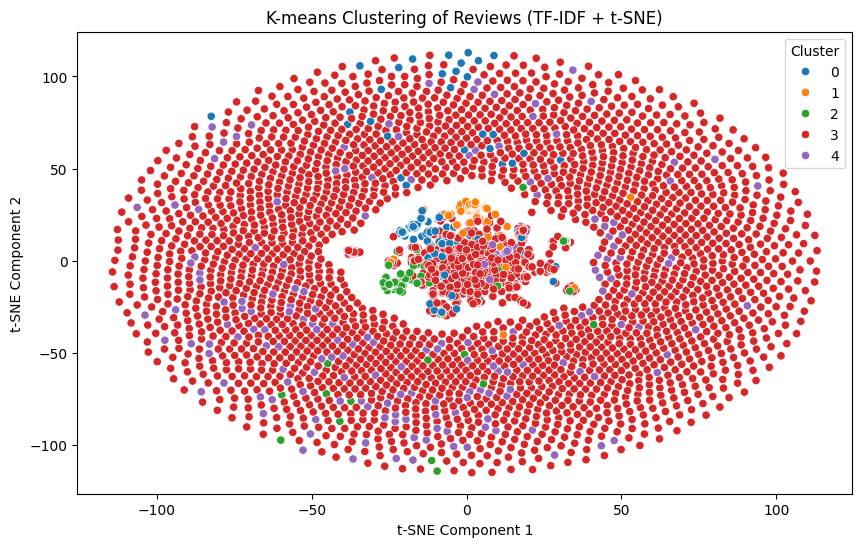

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english')
X = vectorizer.fit_transform(df_sample['cleaned_reviews'])

# Apply K-means clustering
k = 5  # You can experiment with different values
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Add the cluster labels to the dataframe
df_sample['kmeans_cluster'] = kmeans_labels

# Dimensionality reduction for visualization (t-SNE)
tsne = TSNE(n_components=2, random_state=42, perplexity=40)
X_tsne = tsne.fit_transform(X.toarray())

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=kmeans_labels, palette='tab10')
plt.title('K-means Clustering of Reviews (TF-IDF + t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()


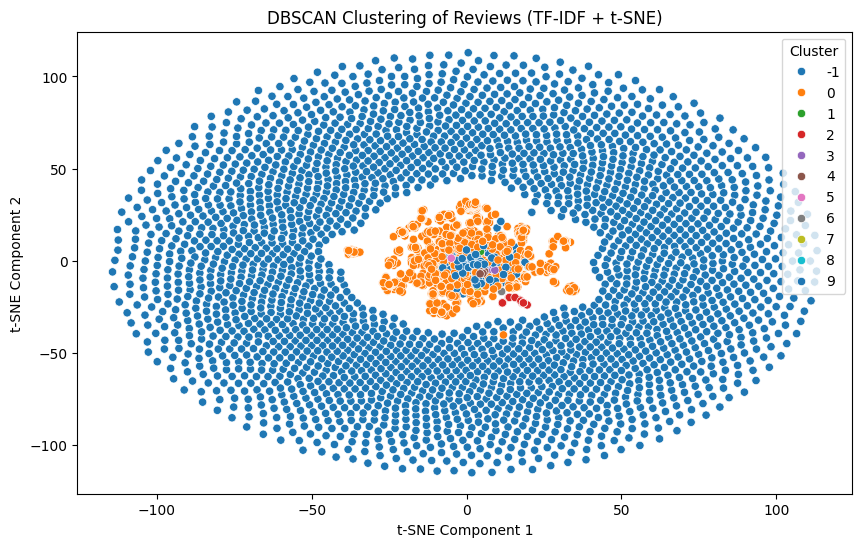

In [19]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
# eps: neighborhood size, min_samples: minimum number of points to form a dense region
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='cosine')
dbscan_labels = dbscan.fit_predict(X)

# Add DBSCAN labels to DataFrame
df_sample['dbscan_cluster'] = dbscan_labels

# Visualize DBSCAN clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=dbscan_labels, palette='tab10', legend='full')
plt.title('DBSCAN Clustering of Reviews (TF-IDF + t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()


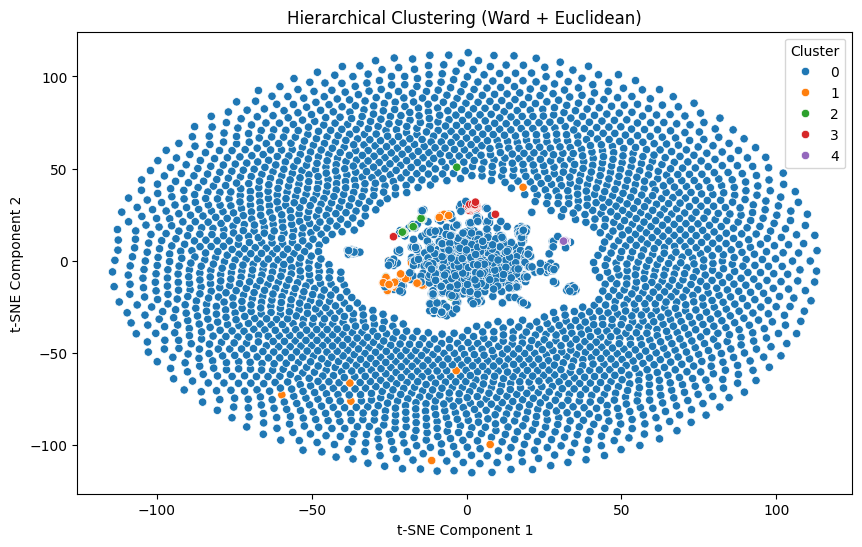

In [20]:
from sklearn.cluster import AgglomerativeClustering

# Use Euclidean distance with Ward linkage
hierarchical = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X.toarray())

# Add cluster labels
df_sample['hierarchical_cluster'] = hierarchical_labels

# Visualize
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=hierarchical_labels, palette='tab10')
plt.title('Hierarchical Clustering (Ward + Euclidean)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()




In [21]:
!pip install numpy==1.24.4
!pip install spacy gensim scikit-learn matplotlib seaborn
!python -m spacy download en_core_web_sm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 90.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is 

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
^C
^C


In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('Amazon_Unlocked_Mobile.csv')

# Drop null reviews
df = df.dropna(subset=['Reviews'])

# Use a sample for speed
df_sample = df.sample(n=2000, random_state=42).copy()

# Check sample
df_sample.head()


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
262853,Nokia C3 (C3-00) WHITE Unlocked Phone,Nokia,59.95,2,I needed a texting phone that did not require ...,1.0
70999,"Apple iPhone 6S Plus Unlocked Smartphone, 32 G...",Apple,749.99,5,Excellent!,0.0
324745,Samsung Galaxy Note 3 N9005 Unlocked Cellphone...,Samsung,325.16,5,I recommend this excellent team for the many d...,0.0
114637,BLU Dash L Unlocked Smartphone - Global GSM - ...,BLU,49.99,5,updated review. Purchased this phone on Novemb...,5.0
221325,"LG G3 D855 Factory Unlocked Cellphone, Interna...",LG,195.99,3,battery fail,0.0


In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv('Amazon_Unlocked_Mobile.csv')

# Drop null reviews
df = df.dropna(subset=['Reviews'])

# Use a sample for speed
df_sample = df.sample(n=2000, random_state=42).copy()

# Check sample
df_sample.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
262853,Nokia C3 (C3-00) WHITE Unlocked Phone,Nokia,59.95,2,I needed a texting phone that did not require ...,1.0
70999,"Apple iPhone 6S Plus Unlocked Smartphone, 32 G...",Apple,749.99,5,Excellent!,0.0
324745,Samsung Galaxy Note 3 N9005 Unlocked Cellphone...,Samsung,325.16,5,I recommend this excellent team for the many d...,0.0
114637,BLU Dash L Unlocked Smartphone - Global GSM - ...,BLU,49.99,5,updated review. Purchased this phone on Novemb...,5.0
221325,"LG G3 D855 Factory Unlocked Cellphone, Interna...",LG,195.99,3,battery fail,0.0


In [3]:
import spacy

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Tokenization using spaCy
def spacy_tokenizer(text):
    doc = nlp(text)
    return [token.text for token in doc if token.is_alpha and not token.is_stop]

# Apply tokenizer
tokenized_reviews = df_sample['cleaned_reviews'].apply(spacy_tokenizer)


In [5]:
import re

def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)               # Remove HTML tags
    text = re.sub(r'[^a-zA-Z ]', '', text)          # Remove non-letters
    text = text.lower().strip()
    return text

df_sample['cleaned_reviews'] = df_sample['Reviews'].apply(preprocess_text)


In [6]:
import spacy

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Tokenization using spaCy
def spacy_tokenizer(text):
    doc = nlp(text)
    return [token.text for token in doc if token.is_alpha and not token.is_stop]

# Apply tokenizer
tokenized_reviews = df_sample['cleaned_reviews'].apply(spacy_tokenizer)


In [7]:
from gensim.models import Word2Vec
import numpy as np

# Train Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=2, workers=4, sg=1, seed=42)

# Function to get average vector for a sentence
def get_sentence_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Generate sentence embeddings
sentence_vectors = tokenized_reviews.apply(lambda x: get_sentence_vector(x, w2v_model))
X_w2v = np.vstack(sentence_vectors.values)


In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
w2v_labels = kmeans.fit_predict(X_w2v)

df_sample['word2vec_cluster'] = w2v_labels


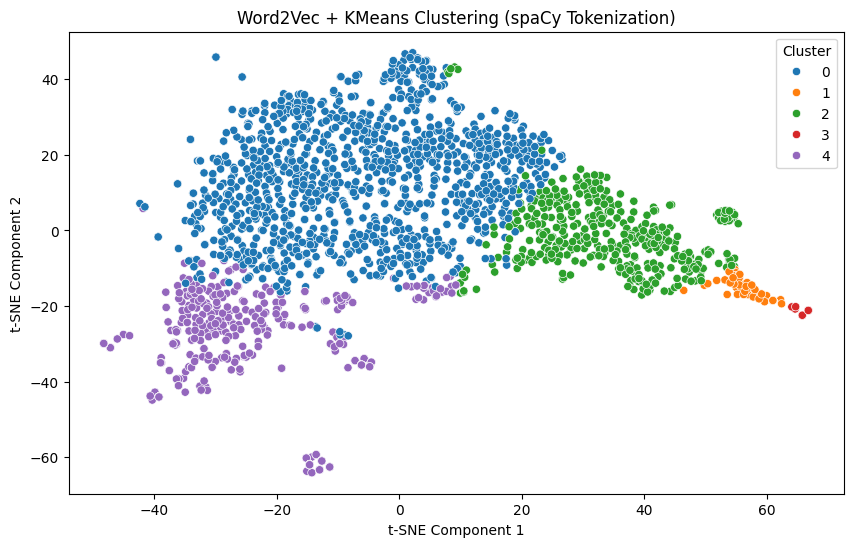

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce dimensions for visualization
tsne = TSNE(n_components=2, perplexity=40, random_state=42)
X_2d = tsne.fit_transform(X_w2v)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=w2v_labels, palette='tab10')
plt.title('Word2Vec + KMeans Clustering (spaCy Tokenization)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**



Four cluster tests have been run on the Amazon mobile reviews data set, and all four cluster tests are catching something other than data. TF-IDF vector-based K-means clustering has provided clean and neat clusters but vulnerable to pre-defined number of clusters (k=5) and spherical shape of cluster, which cannot be achieved by using text high-dimensional data. DBSCAN suitable for dense clusters and without knowing the number of clusters and clusters but noise-resistant at the cost of high-dimensional TF-IDF feature space, most likely will assign most of the points as outlier (cluster -1). Euclidean distance and Ward linkage hierarchical clustering. Created good clusters with dendrogram-like structure and efficient computationally. Word2Vec with K-means formed semantically natural word sense clusterings from context word sense word sense word sense word sense-based word sense search from word value vector and cluster value value optimization, but Word2Vec was affected by Word2Vec model quality and scope. Word2Vec averaged semantically natural clusterings more often, and surface-term frequency-dependent K-means and hierarchical methods were founded. DBSCAN irrespective of dense group discovery optimization was also marred by TF-IDF vector sparsity. BERT was not used, but would be more contextual than Word2Vec when so used.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

**(Your submission will not be graded if this question is left unanswered)**

